In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statistics

**Load Dataset: Tips**

In [5]:
df = sns.load_dataset('Tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Mean, Median, Mode

In [8]:
np.mean(df['total_bill'])

19.785942622950824

In [9]:
np.median(df['total_bill'])

17.795

In [11]:
statistics.mode(df['sex'])

'Male'

# Graphhical Representation

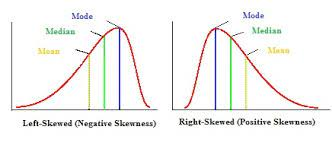

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

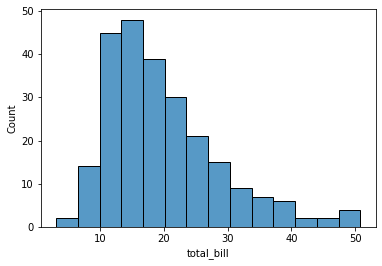

In [16]:
#Histogram
sns.histplot(df['total_bill'])

**observation:
 Right-Skewed Distribution**

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

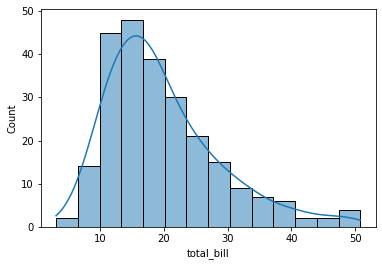

In [17]:
#with Kernel Density Estimator
sns.histplot(df['total_bill'], kde=True)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

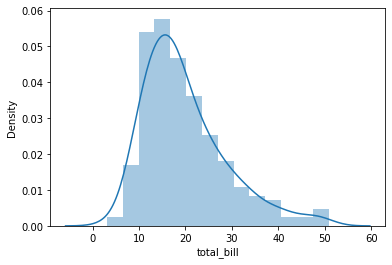

In [15]:
sns.distplot(df['total_bill'])

**Load Dataset: Iris**

In [23]:
df1 = sns.load_dataset('Iris')

In [24]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

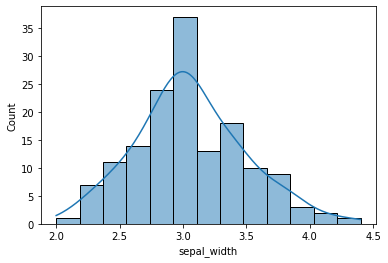

In [26]:
sns.histplot(df1['sepal_width'], kde=True)

**observation: Normal / Gaussian Distribution**

<AxesSubplot:xlabel='species', ylabel='count'>

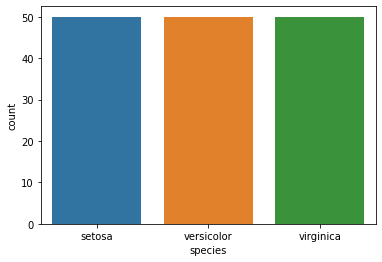

In [27]:
#countplot
sns.countplot(df1['species'])

# Percentile

In [30]:
#q1, q3
np.percentile(df1['sepal_length'], [25,75])

array([5.1, 6.4])

# Finding Outliers

In [36]:
data = [11,12,5,4,12,13,18,19,16,10,18,12,17,14,18,19,20,21,22,21,11,12,13,15,16,17,13,14,15,14,15,16,17,1,11,17,182,15,17,16,166]

**Method 1: Python Function**

In [31]:
# if data is normally distributed then after 3rd standard deviation data is outlier.

In [42]:
outliers = []

def find_outliers(data):
    threshold = 3   #third standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
        outliers.append(i)
    return outliers
    

In [43]:
find_outliers(data)

[166]

**Method 2: Histogram**

(array([35.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  1. ,  19.1,  37.2,  55.3,  73.4,  91.5, 109.6, 127.7, 145.8,
        163.9, 182. ]),
 <BarContainer object of 10 artists>)

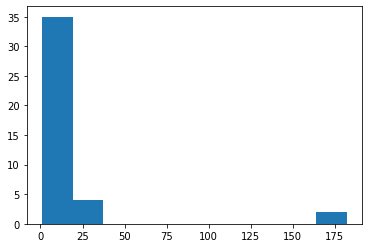

In [37]:
plt.hist(data)

**Method 3:  Boxplot**

<AxesSubplot:>

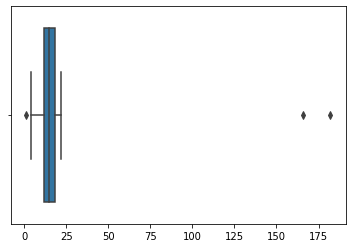

In [44]:
sns.boxplot(data)

**Method 4 : IQR**

Step1: Sort the data

Step2: Calculate Q1 and Q3

Step3: Find the lower fence: Q1 - 1.5(IQR)

Step4: Find the upper fence: Q1 + 1.5(IQR)

In [46]:
#step1
dataset = sorted(data)
dataset

[1,
 4,
 5,
 10,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 20,
 21,
 21,
 22,
 166,
 182]

In [48]:
#step2
q1,q3 = np.percentile(dataset,[25,75])
q1, q3

(12.0, 18.0)

In [49]:
IQR = q3-q1
IQR

6.0

In [51]:
#step3
Lower_Fence =  q1 - (1.5*IQR)
Upper_Fence =  q1 + (1.5*IQR)

In [53]:
print(Lower_Fence, Upper_Fence)

3.0 21.0


In [64]:
for i in dataset:
    if (i<3.0):
        print("Outliers : ", i)

Outliers :  1


In [65]:
for i in dataset:
    if (i>21.0):
        print("Outliers : ", i)

Outliers :  22
Outliers :  166
Outliers :  182
